In [2]:
# Import libraries

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) #Adjust the configuration of the created plot

# Read Data

df = pd.read_csv(r'/Users/osamashafiq/Downloads/Movies.csv')

In [3]:
for col in df.columns :
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))


name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [4]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [42]:
df['budget'] = df['budget'].astype('int64')

df['gross'] = df['gross'].astype('int64')


In [109]:
df['yearupdated'] = df['year'].astype(str).str[:4] # Creating new column at 4 digits

In [110]:
df = df.sort_values(by=['gross'], inplace=False, ascending=False) # sorting the df

In [92]:
pd.set_option('display.max_rows', None)   # To display maximum rows

In [126]:
df['company'].drop_duplicates().sort_values(ascending=False) # Drop the duplicates

7129    2384
5664    2383
6412    2382
4007    2381
6793    2380
6420    2379
3776    2378
524     2377
3330    2376
520     2375
2213    2374
6222    2373
3698    2372
1175    2371
5180    2370
3193    2369
1321    2368
1329    2367
789     2366
5125    2365
5499    2364
4637    2363
4990    2362
5410    2361
7576    2360
4347    2359
6798    2358
6919    2357
4392    2356
4999    2355
425     2354
6674    2353
3749    2352
3637    2351
2173    2350
4272    2349
450     2348
3624    2347
3943    2346
2466    2345
818     2344
2355    2343
6720    2342
5276    2341
7032    2340
4863    2339
6133    2338
4572    2337
6616    2336
1306    2335
1475    2334
5715    2333
1421    2332
7017    2331
1304    2330
7225    2329
5496    2328
6672    2327
5395    2326
4886    2325
4781    2324
7267    2323
2843    2322
6578    2321
2341    2320
5845    2319
7401    2318
222     2317
7480    2316
7494    2315
5075    2314
729     2313
4975    2312
7420    2311
5272    2310
5409    2309
7625    2308

<function matplotlib.pyplot.show(close=None, block=None)>

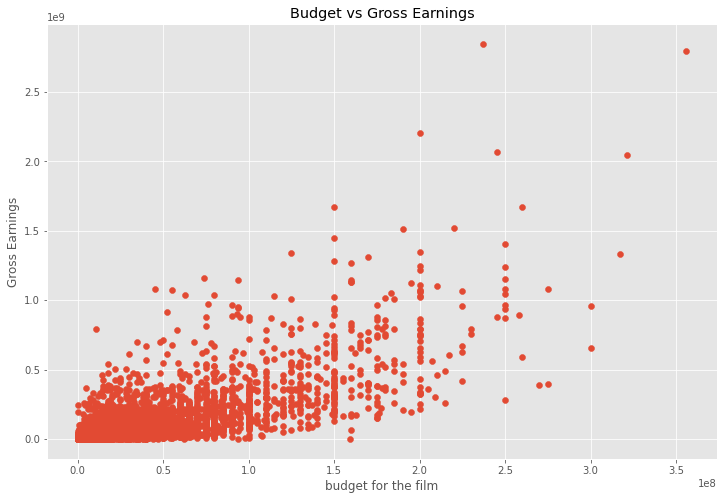

In [94]:
# Scatter plot with budget vs gros

plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('budget for the film')
plt.ylabel('Gross Earnings')
plt.show

In [121]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearupdated
5445,533,5,0,2009,696,7.8,1100000.0,1155,1778,2334,55,237000000.0,2.847246e+09,2253,162.0,29
7445,535,5,0,2019,183,8.4,903000.0,162,743,2241,55,356000000.0,2.797501e+09,1606,181.0,39
3045,6896,5,6,1997,704,7.8,1100000.0,1155,1778,1595,55,200000000.0,2.201647e+09,2253,194.0,17
6663,5144,5,0,2015,698,7.8,876000.0,1125,2550,524,55,245000000.0,2.069522e+09,1540,138.0,35
7244,536,5,0,2018,192,8.4,897000.0,162,743,2241,55,321000000.0,2.048360e+09,1606,149.0,38


<AxesSubplot:xlabel='budget', ylabel='gross'>

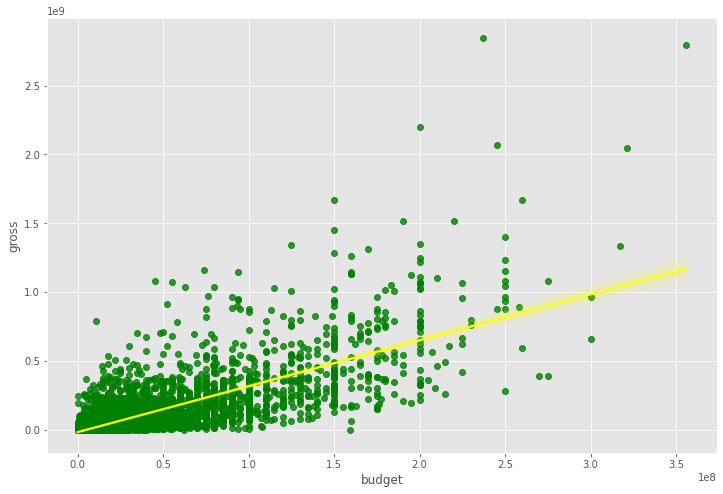

In [69]:
# Plot budget vs gross using seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws= {"color": "green"}, line_kws={"color": "yellow"})

In [78]:
df.corr(method='pearson') # Types of correlation Pearson, Kendall, Spearman

,year,score,votes,budget,gross,runtime
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000


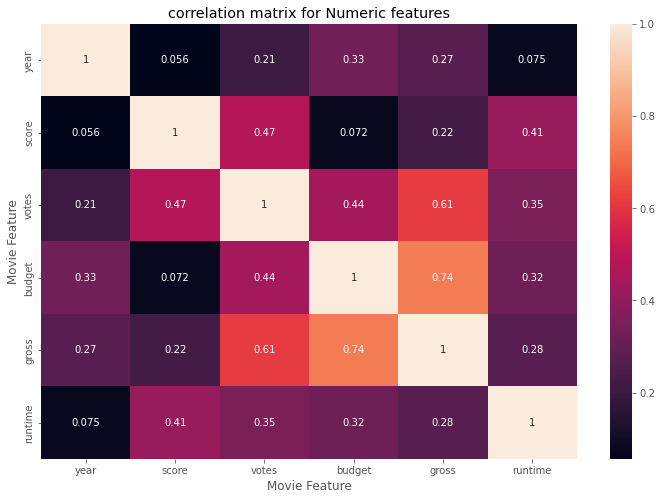

In [82]:
correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)
plt.title('correlation matrix for Numeric features')
plt.xlabel('Movie Feature')
plt.ylabel('Movie Feature')

plt.show()

In [122]:
# changing everything from string to numeric

df_Numerized = df

for col_name in df_Numerized.columns:
    if(df_Numerized[col_name].dtype == 'object'):
         df_Numerized[col_name] = df_Numerized[col_name].astype('category')
         df_Numerized[col_name] =  df_Numerized[col_name].cat.codes
        
df_Numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearupdated
5445,533,5,0,2009,696,7.8,1100000.0,1155,1778,2334,55,237000000.0,2.847246e+09,2253,162.0,29
7445,535,5,0,2019,183,8.4,903000.0,162,743,2241,55,356000000.0,2.797501e+09,1606,181.0,39
3045,6896,5,6,1997,704,7.8,1100000.0,1155,1778,1595,55,200000000.0,2.201647e+09,2253,194.0,17
6663,5144,5,0,2015,698,7.8,876000.0,1125,2550,524,55,245000000.0,2.069522e+09,1540,138.0,35
7244,536,5,0,2018,192,8.4,897000.0,162,743,2241,55,321000000.0,2.048360e+09,1606,149.0,38


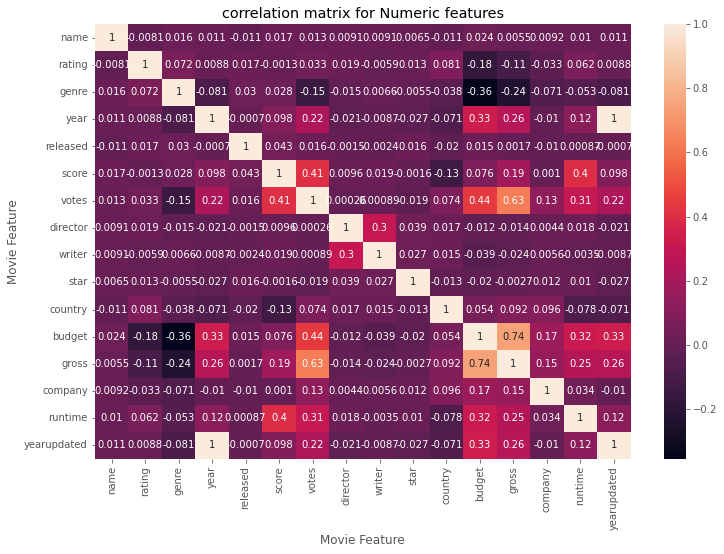

In [112]:
correlation_matrix = df_Numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)
plt.title('correlation matrix for Numeric features')
plt.xlabel('Movie Feature')
plt.ylabel('Movie Feature')

plt.show()

In [116]:
correlation_mat = df_Numerized.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs

name         name           1.000000
             rating        -0.008069
             genre          0.016355
             year           0.011453
             released      -0.011311
             score          0.017097
             votes          0.013088
             director       0.009079
             writer         0.009081
             star           0.006472
             country       -0.010737
             budget         0.023970
             gross          0.005533
             company        0.009211
             runtime        0.010392
             yearupdated    0.011453
rating       name          -0.008069
             rating         1.000000
             genre          0.072423
             year           0.008779
             released       0.016613
             score         -0.001314
             votes          0.033225
             director       0.019483
             writer        -0.005921
             star           0.013405
             country        0.081244
 

In [119]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

budget       genre         -0.356564
genre        budget        -0.356564
gross        genre         -0.235650
genre        gross         -0.235650
rating       budget        -0.176002
budget       rating        -0.176002
votes        genre         -0.145307
genre        votes         -0.145307
score        country       -0.133348
country      score         -0.133348
rating       gross         -0.107339
gross        rating        -0.107339
year         genre         -0.081261
genre        year          -0.081261
             yearupdated   -0.081261
yearupdated  genre         -0.081261
country      runtime       -0.078412
runtime      country       -0.078412
company      genre         -0.071067
genre        company       -0.071067
yearupdated  country       -0.070938
country      yearupdated   -0.070938
year         country       -0.070938
country      year          -0.070938
genre        runtime       -0.052711
runtime      genre         -0.052711
budget       writer        -0.039451
w

In [120]:
High_corr = sorted_pairs[(sorted_pairs)> 0.5]

High_corr

votes        gross          0.630757
gross        votes          0.630757
             budget         0.740395
budget       gross          0.740395
name         name           1.000000
company      company        1.000000
rating       rating         1.000000
genre        genre          1.000000
year         year           1.000000
released     released       1.000000
score        score          1.000000
runtime      runtime        1.000000
votes        votes          1.000000
writer       writer         1.000000
star         star           1.000000
country      country        1.000000
budget       budget         1.000000
gross        gross          1.000000
director     director       1.000000
yearupdated  yearupdated    1.000000
             year           1.000000
year         yearupdated    1.000000
dtype: float64

In [ ]:
# Votes & Budget have the highest correlation to the gross earnings
